**import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
import glob

**Fetching the** **data**

In [2]:
#testing data
damage_test=glob.glob(r"C:\Users\hp\Desktop\edure\projects\Deep Learning\Capstone Project\Hurricane Damage Classifiaction\test_another\damage\*.jpeg")
no_damage_test=glob.glob(r"C:\Users\hp\Desktop\edure\projects\Deep Learning\Capstone Project\Hurricane Damage Classifiaction\test_another\no_damage\*.jpeg")
#training data
damage_train=glob.glob(r"C:\Users\hp\Desktop\edure\projects\Deep Learning\Capstone Project\Hurricane Damage Classifiaction\train_another\damage\*.jpeg")
no_damage_train=glob.glob(r"C:\Users\hp\Desktop\edure\projects\Deep Learning\Capstone Project\Hurricane Damage Classifiaction\train_another\no_damage\*.jpeg")

**find number of images of all classes in training and testing data**

In [3]:
#number of images in training data
print(f"Number of images in training set are \nDamage: {len(damage_train)}\nNo Damage: {len(no_damage_train)}")
#number of images in testing data
print(f"\n\nNumber of images in testing set are \nDamage: {len(damage_test)}\nNo Damage: {len(no_damage_test)}")

Number of images in training set are 
Damage: 5000
No Damage: 5000


Number of images in testing set are 
Damage: 8000
No Damage: 1000


**Store all the images inside a list and create a list with the corresponding labels**

Training

In [4]:
image=[]
label=[]
for i in damage_train:
  img=plt.imread(i)
  image.append(img)
  label.append(0)
for i in no_damage_train:
  img=plt.imread(i)
  image.append(img)
  label.append(1)

Testing

In [5]:
image_test=[]
label_test=[]
for i in damage_test:
  img=plt.imread(i)
  image_test.append(img)
  label_test.append(0)
for i in no_damage_test:
  img=plt.imread(i)
  image_test.append(img)
  label_test.append(1)

**Shuffle both images and label(in both training and testing set)**

In [6]:
#training set
image,label=shuffle(image,label,random_state=100)
#testing set
image_test,label_test=shuffle(image_test,label_test,random_state=100)

**plot some of the images(either from train or test set)**

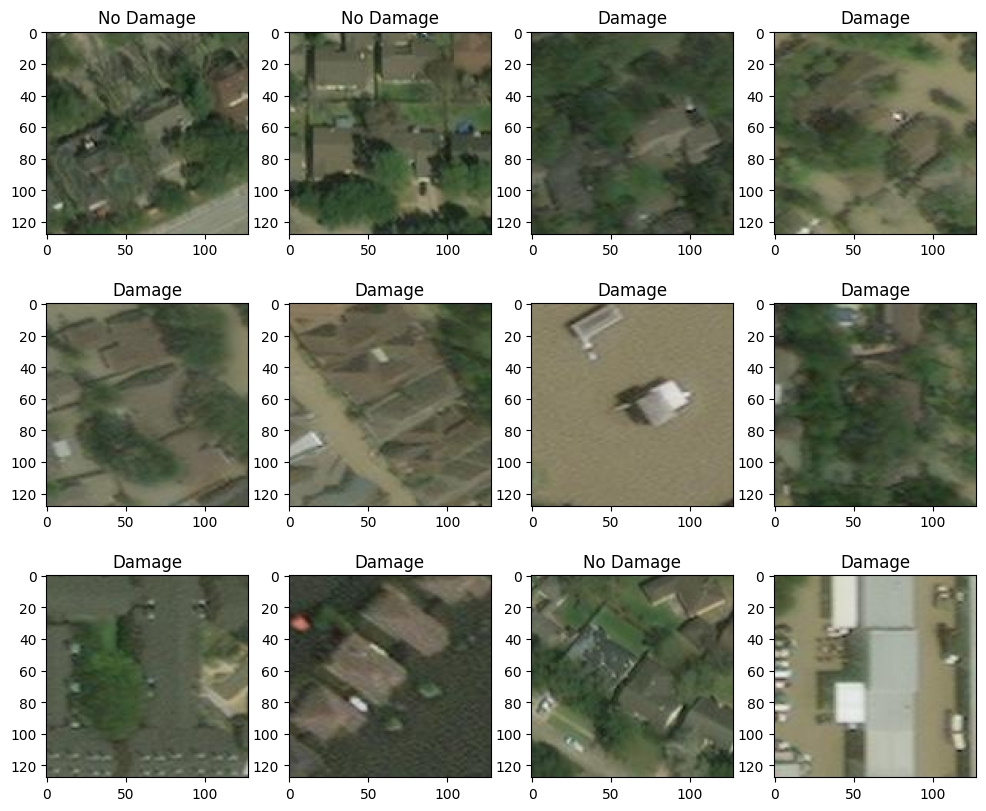

In [7]:
plt.figure(figsize=(12,10))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.imshow(image[i])
  if label[i]==0:
           plt.title("Damage")
  else:
           plt.title("No Damage")

**check the shape of images in our list**

In [8]:
for i in image_test:
  shapes=[]
  shapes.append(i.shape)
  shapes=set(shapes)
shapes

{(128, 128, 3)}

**Create a numpy arrays for images (Training and testing)**

In [9]:
X_train=np.array(image)
X_test=np.array(image_test)

**Create numpy array for labels(training and testing)**

In [10]:
y_train=np.array(label)
y_test=np.array(label_test)

**Check the type of X_train ,X_test,y_train,y_test**

In [11]:
print(f"type of X_train: {type(X_train)}")
print(f"type of y_train: {type(y_train)}")
print(f"type of X_test: {type(X_test)}")
print(f"type of y_test: {type(y_test)}")

type of X_train: <class 'numpy.ndarray'>
type of y_train: <class 'numpy.ndarray'>
type of X_test: <class 'numpy.ndarray'>
type of y_test: <class 'numpy.ndarray'>


**Check the shape of X_train,X_test,y_train and y_test**

In [12]:
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (10000, 128, 128, 3)
Shape of y_train: (10000,)
Shape of X_test: (9000, 128, 128, 3)
Shape of y_test: (9000,)


## **Create a keras Sequential model with convolution layers**

In [13]:
from tensorflow.keras import Sequential,layers

model = Sequential()

model.add(layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (128,128,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(32, activation ='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model**

In [14]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

**Summary of the model**

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,843,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,850,465 (7.06 MB)

 Trainable params: 1,850,465 (7.06 MB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

In [16]:
model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 55s 185ms/step - accuracy: 0.6477 - loss: 50.7331 - val_accuracy: 0.7920 - val_loss: 0.4531
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 52s 183ms/step - accuracy: 0.8434 - loss: 0.3773 - val_accuracy: 0.8830 - val_loss: 0.2902
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 53s 189ms/step - accuracy: 0.8994 - loss: 0.2509 - val_accuracy: 0.9020 - val_loss: 0.2700
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 52s 183ms/step - accuracy: 0.9399 - loss: 0.1576 - val_accuracy: 0.8840 - val_loss: 0.3138
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 51s 182ms/step - accuracy: 0.9457 - loss: 0.1422 - val_accuracy: 0.8590 - val_loss: 0.3487
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 129s 457ms/step - accuracy: 0.9554 - loss: 0.1220 - val_accuracy: 0.9060 - val_loss: 0.2645
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 53s 188ms/step - accuracy: 0.9633 - loss: 0.1030 - val_accuracy: 0.8850 - val_loss: 0.3217
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 81s 182ms/step - accuracy: 0.9716 - loss:

**Evaluate the model**

In [17]:
model.evaluate(X_train,y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9616 - loss: 0.1091


[0.12840808928012848, 0.9549999833106995]

**Prediction**

In [18]:
prediction=model.predict(X_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step


In [19]:
prediction[:10]

array([[1.0651301e-03],
       [8.0251247e-03],
       [1.1723702e-03],
       [8.1753039e-01],
       [2.7377543e-03],
       [4.9291312e-04],
       [9.9991292e-01],
       [5.6391041e-04],
       [9.9795496e-01],
       [1.2618768e-02]], dtype=float32)

In [20]:
pred = []

for i in prediction:
    if i >0.5:
        pred.append(0)
    else:
        pred.append(1)

In [21]:
pred

[1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


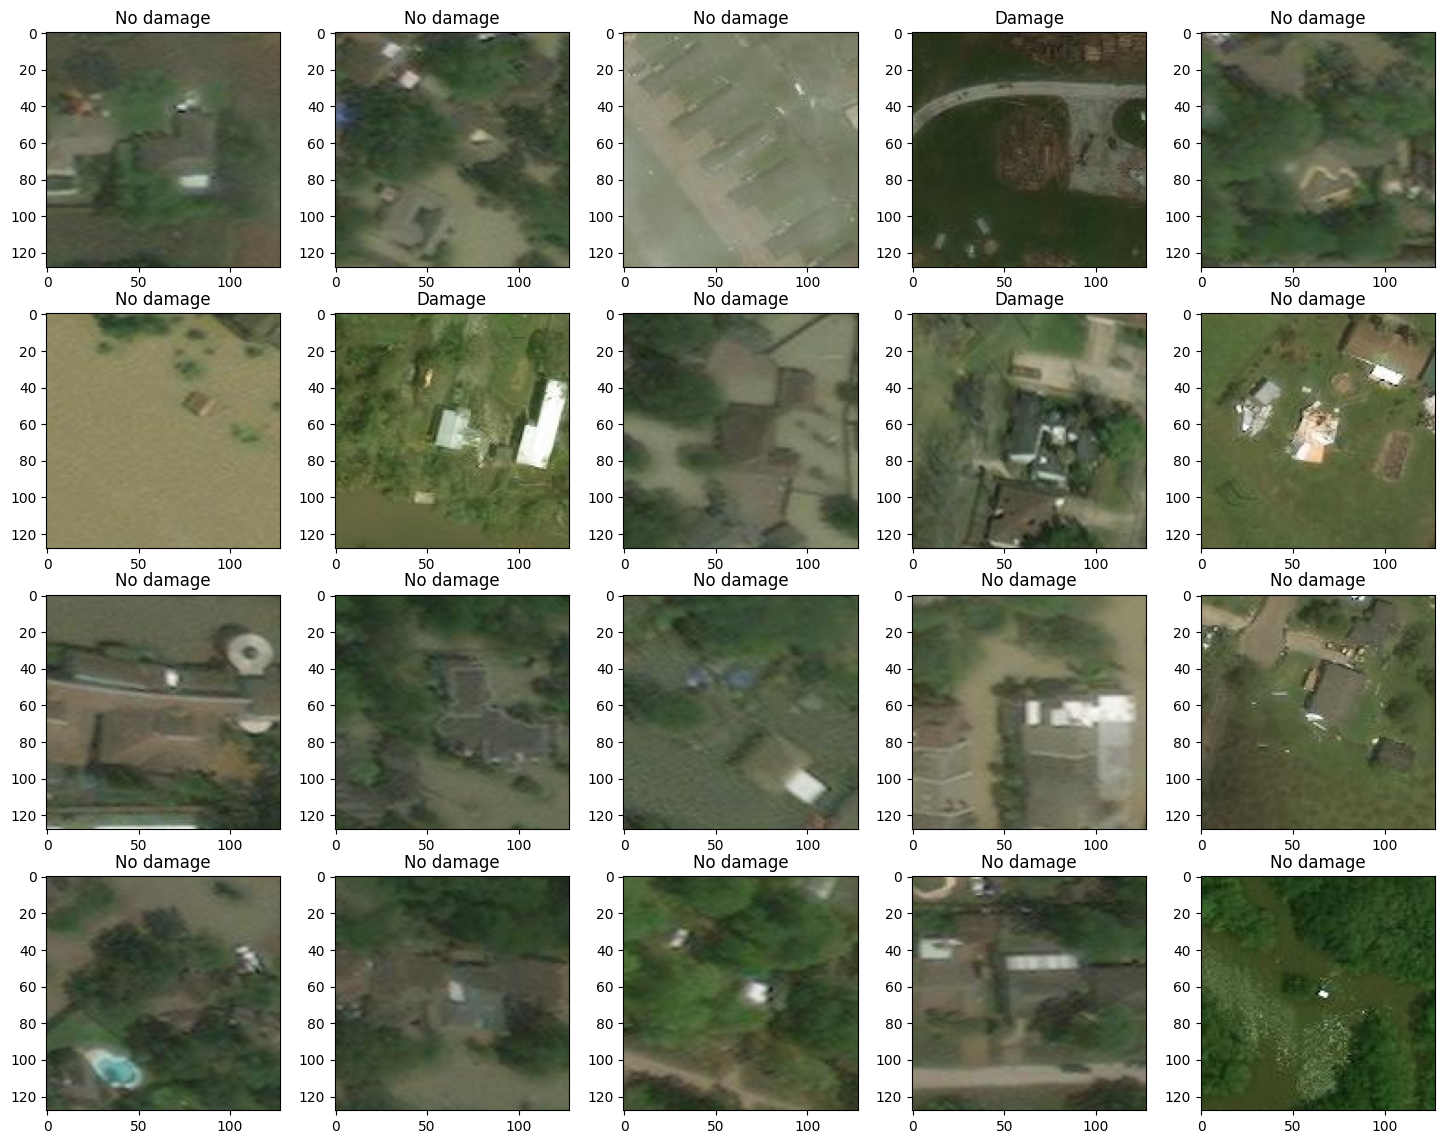

In [22]:

plt.figure(figsize = (18,14))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    if pred[i] == 0:
        plt.title("Damage")
    elif pred[i] == 1:
        plt.title("No damage")